# Main

## Filter times

In [6]:
import ancil_load
import numpy as np
ancil_load=reload(ancil_load)

df_all,price = ancil_load.SA_production_price()

price  = price.dropna()

p1 = np.percentile(price.dropna(),99)
p2 = np.percentile(price.dropna(),100)

price1 = price[price>p1]
price  = price1[price1<p2]

import datetime as dt
price=price.loc[dt.datetime(2016,1,1):dt.datetime(2018,1,1)]

TypeError: Required argument 'month' (pos 2) not found

## Construct plots

In [1]:
### 1.0 MST
### 1.1 Analytics
### 2. Wind and temp
### 3. Solar?

### 1. MST

In [99]:
import ancil_graph
import ancil_load
import pandas as pd
ancil_graph=reload(ancil_graph)
ancil_load=reload(ancil_load)

hi


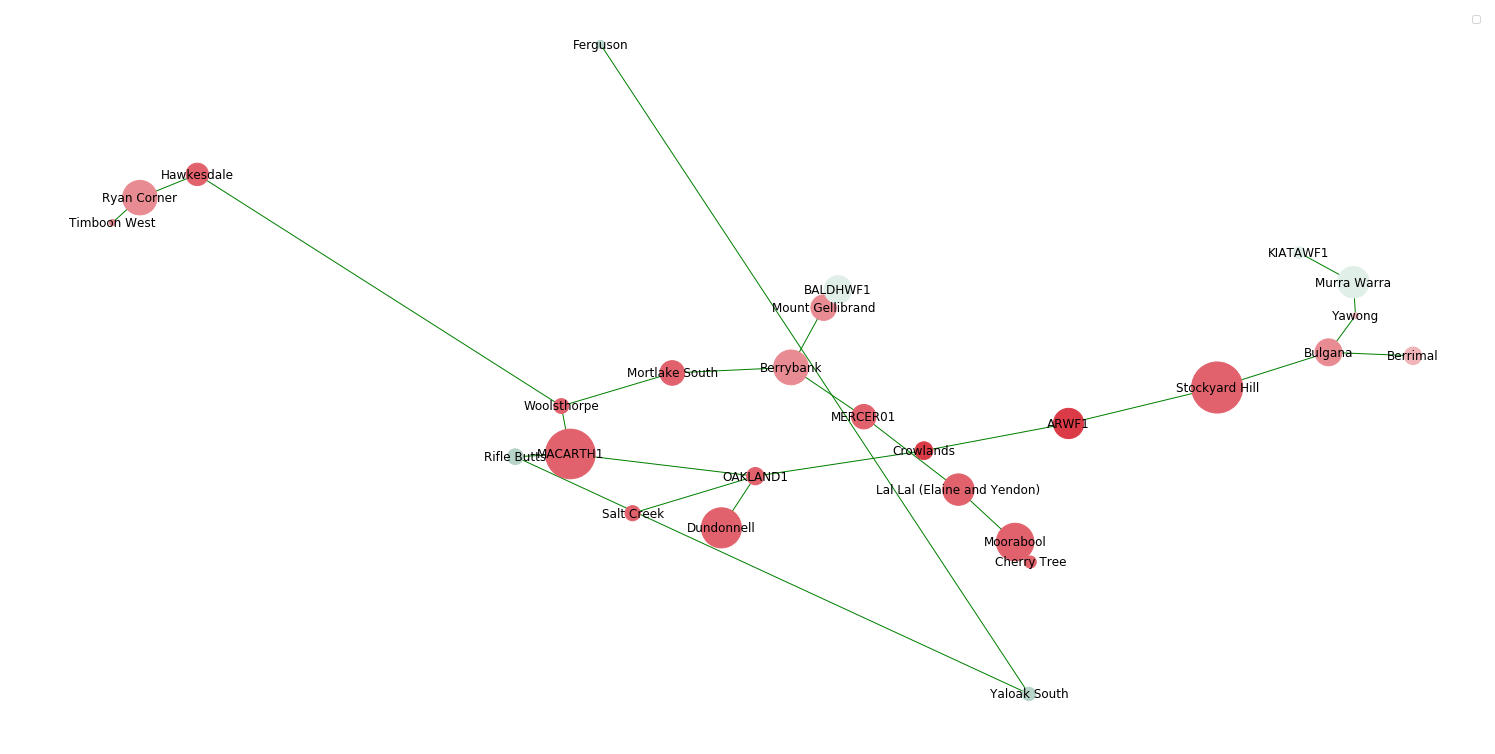

In [103]:
# STEP1 MST maker

outpath="/mnt/y/Code/Analysis/graph/Graph_figures/Victoria/EVENTbased/"

# load MST
df_all = pd.read_csv("/mnt/y/Data/Power/ECMWF/lillypond/future_wind.csv",index_col="time")
df_all.index=pd.DatetimeIndex(df_all.index)
df_all=df_all.drop("Unnamed: 0",axis=1)
df_all=df_all.iloc[1:,:]

price=ancil_load.load_vic_price()
tstart=dt.datetime(2014,1,1)
tstart2=dt.datetime(2014,4,1)
df_delta,df_revenue,G = ancil_load.munge_MST(tstart,tstart2,df_all,price,outpath+"MST/size_prod_color_VF_{0}_{1}.png".format(tstart,tstart2))

In [101]:
year=9999
month=15
day=100
hour=27
rrp=3.1419

<Figure size 1440x720 with 0 Axes>

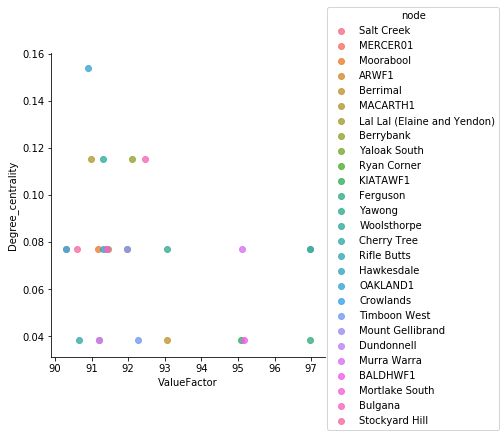

<Figure size 1440x720 with 0 Axes>

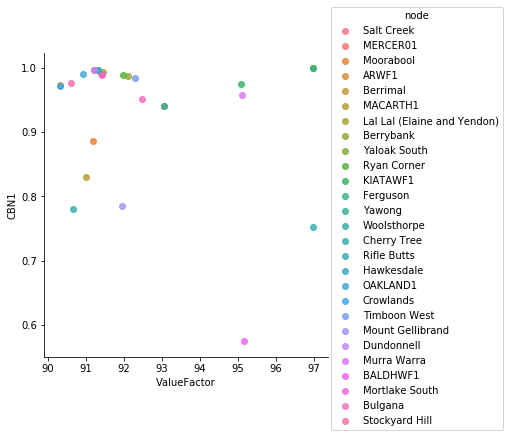

<Figure size 1440x720 with 0 Axes>

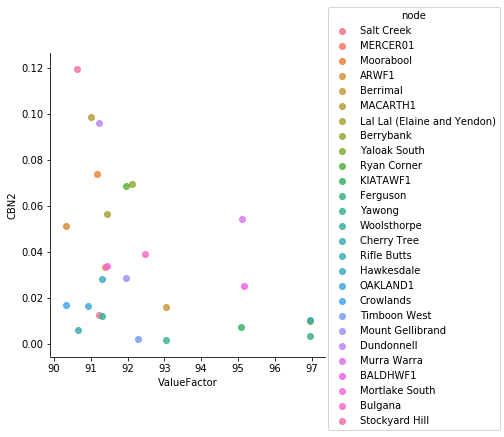

<Figure size 1440x720 with 0 Axes>

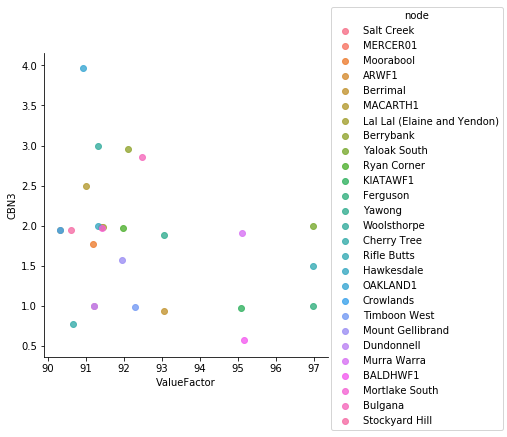

In [113]:
import matplotlib.pyplot as plt
# STEP2 analytics.
df_central=ancil_load.munge_analytics_MST(G,tstart)


import seaborn as sns
# Degree_centrlaity

f=plt.figure(figsize=(20,10))
f=sns.lmplot(data=df_central,x="ValueFactor",y="Degree_centrality",hue="node",fit_reg=False)
f.savefig(outpath+"Degree_centrality/"+"degree_{0}{1:02d}{2:02d}_{3}_RRP_{4}.png".format(year,month,day,hour,rrp))

f=plt.figure(figsize=(20,10))
f=sns.lmplot(data=df_central,x="ValueFactor",y="CBN1",hue="node",fit_reg=False)
f.savefig(outpath+"CBN1/"+"CBN1_{0}{1:02d}{2:02d}_{3}_RRP_{4}.png".format(year,month,day,hour,rrp))


f=plt.figure(figsize=(20,10))
f=sns.lmplot(data=df_central,x="ValueFactor",y="CBN2",hue="node",fit_reg=False)
f.savefig(outpath+"CBN2/"+"CBN2_{0}{1:02d}{2:02d}_{3}_RRP_{4}.png".format(year,month,day,hour,rrp))


f=plt.figure(figsize=(20,10))
f=sns.lmplot(data=df_central,x="ValueFactor",y="CBN3",hue="node",fit_reg=False)
f.savefig(outpath+"CBN3/"+"CBN3_{0}{1:02d}{2:02d}_{3}_RRP_{4}.png".format(year,month,day,hour,rrp))


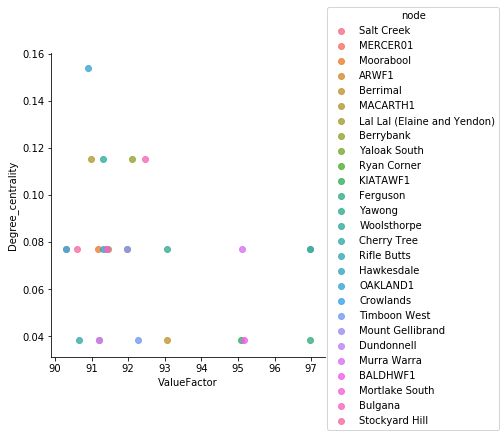

In [111]:
import seaborn as sns
# Degree_centrlaity
a=sns.lmplot(data=df_central,x="ValueFactor",y="Degree_centrality",hue="node",fit_reg=False)
#df.plot.bar(x="node",y="katz")

In [112]:
a.savefig

seaborn.axisgrid.FacetGrid

In [ ]:
df_delta = df_all.loc[tstart:tstart2]
df_revenue=df_delta.mul(price.loc[df_delta.index],axis=0)
G=ancil_graph.makeG1(df_delta,df_revenue,price.loc[df_delta.index],"/mnt/y/Code/Analysis/graph/Graph_figures/Victoria/EVENTbased")


In [18]:
price.index

DatetimeIndex(['2013-01-01 01:00:00', '2013-01-01 02:00:00',
               '2013-01-01 03:00:00', '2013-01-01 04:00:00',
               '2013-01-01 05:00:00', '2013-01-01 06:00:00',
               '2013-01-01 07:00:00', '2013-01-01 08:00:00',
               '2013-01-01 09:00:00', '2013-01-01 10:00:00',
               ...
               '2017-12-31 15:00:00', '2017-12-31 16:00:00',
               '2017-12-31 17:00:00', '2017-12-31 18:00:00',
               '2017-12-31 19:00:00', '2017-12-31 20:00:00',
               '2017-12-31 21:00:00', '2017-12-31 22:00:00',
               '2017-12-31 23:00:00', '2018-01-01 00:00:00'],
              dtype='datetime64[ns]', name=u'SETTLEMENTDATE', length=43992, freq=None)

In [19]:
df_all.index

DatetimeIndex(['2008-01-01 01:00:00', '2008-01-01 02:00:00',
               '2008-01-01 03:00:00', '2008-01-01 04:00:00',
               '2008-01-01 05:00:00', '2008-01-01 06:00:00',
               '2008-01-01 07:00:00', '2008-01-01 08:00:00',
               '2008-01-01 09:00:00', '2008-01-01 10:00:00',
               ...
               '2017-12-31 14:00:00', '2017-12-31 15:00:00',
               '2017-12-31 16:00:00', '2017-12-31 17:00:00',
               '2017-12-31 18:00:00', '2017-12-31 19:00:00',
               '2017-12-31 20:00:00', '2017-12-31 21:00:00',
               '2017-12-31 22:00:00', '2017-12-31 23:00:00'],
              dtype='datetime64[ns]', name=u'time', length=87671, freq=None)

### 2. Wind and TEMP

In [13]:
# wind base name
basefn="/mnt/y/Data/Weather/ECMWF/Data_R/ml/{0}/{1:02d}/era5_hourly_ml_AUS_{0}{1:02d}.nc"

for i,tm in enumerate(price.index):
    ancil_load.Cartopy_Earth_wind(tm,"t",price[i],basefn)

/mnt/y/Code/Analysis/graph/ancil_load.py:423: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/peterad/.local/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/peterad/.local/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/peterad/.local/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/home/peterad/.local/lib

ImportError: No module named crs

### 3. TEMP

## PPTX

In [5]:
from netCDF4 import Dataset, MFDataset, num2date
import matplotlib.pylab as plt
import numpy as np
from matplotlib import cm
import cartopy.crs as ccrs

import sys
import os
from cartopy.util import add_cyclic_point

ImportError: No module named crs